In [172]:
import pandas as pd
import seaborn as sns
import plotly.express as px


# Load in and preprocess Datasets (Fantasy, Combine, Advanced Statistics)

### Fantasy Data (trailing 10 years)

In [199]:
# Import Fantasy data from Pro Football Reference

years_for_pfr_data = ['2021',
                    '2020',
                    '2019',
                    '2018',
                    '2017',
                    '2016',
                    '2015',
                    '2014',
                    '2013',
                    '2012',
                    ]

fantasy_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/years/" + year + "/fantasy.htm" 
    df = pd.read_html(link)[0]
    df['Year'] = year
    fantasy_dfs.append(df)
    
fantasy_df = pd.concat(fantasy_dfs).reset_index(drop=True)

# Flatten dataframe
fantasy_df.columns = fantasy_df.columns.get_level_values(0) + '_' +  fantasy_df.columns.get_level_values(1)

## Preprocess data
# Rename Columns
new_col_names = {'Unnamed: 0_level_0_Rk': 'Rank',
        'Unnamed: 1_level_0_Player': 'Player',
        'Unnamed: 2_level_0_Tm': 'Team',
        'Unnamed: 3_level_0_FantPos': 'Position',
        'Unnamed: 4_level_0_Age': 'Age',
        'Year_': 'Year'}
        
fantasy_df.rename(columns=new_col_names, inplace=True)

# Drop rows where column names are printed again (formatting issue w/ PFR website)
fantasy_df = fantasy_df[~fantasy_df['Rank'].isin(['Rk'])]

# Drop rows where Position is null (formatting issue w/ PFR website)
fantasy_df = fantasy_df[fantasy_df['Position'].notna()]

# Clean Player Name Column
fantasy_df['Player'] = fantasy_df['Player'].str.strip('*+')

# Fill NaN cells with 0
fantasy_df = fantasy_df.fillna(0)

# Rank Overall Fantasy Rank by Year (All values weren't filled in initally, must be added to dataset in place of zeros)
# ...

# Update Datatypes for columns
convert_dtype_dict = {'Rank': int,
                'Player': str,
                'Team': str,
                'Position': str,
                'Age': int,
                'Games_G': int,
                'Games_GS': int,
                'Passing_Cmp': int,
                'Passing_Att': int,
                'Passing_Yds': int,
                'Passing_TD': int,
                'Passing_Int': int,
                'Rushing_Att': int,
                'Rushing_Yds': int,
                'Rushing_Y/A': float,
                'Rushing_TD': int,
                'Receiving_Tgt': int,
                'Receiving_Rec': int,
                'Receiving_Yds': int,
                'Receiving_Y/R': float,
                'Receiving_TD': int,
                'Fumbles_Fmb': int,
                'Fumbles_FL': int,
                'Scoring_TD': int,
                'Scoring_2PM': int,
                'Scoring_2PP': int,
                'Fantasy_FantPt': int,
                'Fantasy_PPR': float,
                'Fantasy_DKPt': float,
                'Fantasy_FDPt': float,
                'Fantasy_VBD': float,
                'Fantasy_PosRank': int,
                'Fantasy_OvRank': int,
                'Year': str
                }
 
fantasy_df = fantasy_df.astype(convert_dtype_dict)

# shift column 'Year' to first position
first_column = fantasy_df.pop('Year')
  
# insert column at front of df
fantasy_df.insert(0, 'Year', first_column)

# Uncomment to Save dataset as flatfile (if desired)
#fantasy_df.to_csv('data/pfr_10yr_data_2022.csv')

### Standard Analytics from PFR (trailing 10 years)

In [200]:
## Passing Data
years_for_pfr_data = ['2021',
                    '2020',
                    '2019',
                    '2018',
                    '2017',
                    '2016',
                    '2015',
                    '2014',
                    '2013',
                    '2012',
                    ]

passing_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/years/" + year + "/passing.htm" 
    df = pd.read_html(link)[0]
    df['Year'] = year
    passing_dfs.append(df)
    
passing_df = pd.concat(passing_dfs).reset_index(drop=True)

# Rename Columns
new_col_names = {'Rk': 'Rank',
        'Att': 'Passing_Att',
        'TD%': 'Passing_TD%',
        'Int%': 'Passing_Int%',
        '1D': 'Passing_1D',
        'Lng': 'Passing_Lng',
        'Y/A': 'Passing_Y/A',
        'AY/A': 'Passing_AY/A',
        'Y/C': 'Passing_Y/C',
        'Y/G': 'Passing_Y/G',
        'Rate': 'Passing_Rate',
        'QBR': 'Passing_QBR',
        'Sk': 'Passing_Sk',
        'Sk%': 'Passing_Sk%',
        'NY/A': 'Passing_NY/A',
        'ANY/A': 'Passing_ANY/A'}
        
passing_df.rename(columns=new_col_names, inplace=True)

# Drop rows where column names are printed again (formatting issue w/ PFR website)
passing_df = passing_df[~passing_df['Rank'].isin(['Rk'])]

# Clean Player Name Column
passing_df['Player'] = passing_df['Player'].str.strip('*+')

# Update Datatypes for columns
convert_dtype_dict = {'Player': str,
                'Passing_Att': int,
                'Passing_TD%': float,
                'Passing_Int%': float,
                'Passing_1D': int,
                'Passing_Lng': int,
                'Passing_Y/A': float,
                'Passing_AY/A': float,
                'Passing_Y/C': float,
                'Passing_Y/G': float,
                'Passing_Rate': float,
                'Passing_QBR': float,
                'Passing_Sk': str,
                'Passing_Sk%': float,
                'Passing_NY/A': float,
                'Passing_ANY/A': float
                }
passing_df = passing_df.astype(convert_dtype_dict)

# Downselect rows to players that threw 20 or more passes
passing_df = passing_df[passing_df['Passing_Att'] >= 20]

# Downselect columns
passing_df = passing_df[['Player','Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Y/G','Passing_Rate','Passing_QBR','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Year']]

# Uncomment to Save dataset as flatfile (if desired)
passing_df.to_csv('data/pfr_10yr_passing_data_2022.csv')


## Rushing Data
rushing_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/years/" + year + "/rushing.htm" 
    df = pd.read_html(link)[0]
    df['Year'] = year
    rushing_dfs.append(df)
    
rushing_df = pd.concat(rushing_dfs).reset_index(drop=True)

# Flatten dataframe
rushing_df.columns = rushing_df.columns.get_level_values(0) + '_' +  rushing_df.columns.get_level_values(1)

# Rename Columns
new_col_names = {'Unnamed: 0_level_0_Rk': 'Rank',
        'Unnamed: 1_level_0_Player': 'Player',
        'Unnamed: 2_level_0_Tm': 'Team',
        'Unnamed: 3_level_0_Age': 'Age',
        'Unnamed: 4_level_0_Pos': 'Position',
        'Unnamed: 14_level_0_Pos': 'Rushing_Fumbles',
        'Year_': 'Year'}
        
rushing_df.rename(columns=new_col_names, inplace=True)

# Drop rows where column names are printed again (formatting issue w/ PFR website)
rushing_df = rushing_df[~rushing_df['Rank'].isin(['Rk'])]

# Clean Player Name Column
rushing_df['Player'] = rushing_df['Player'].str.strip('*+')

# Update Datatypes for columns
convert_dtype_dict = {'Player': str,
                'Rushing_1D': int,
                'Rushing_Lng': int,
                'Rushing_Y/A': float,
                'Rushing_Y/G': float,
                'Year': str
                }
rushing_df = rushing_df.astype(convert_dtype_dict)

# Downselect columns
rushing_df = rushing_df[['Player','Rushing_1D','Rushing_Lng','Rushing_Y/A','Rushing_Y/G','Year']]

# Uncomment to Save dataset as flatfile (if desired)
rushing_df.to_csv('data/pfr_10yr_rushing_data_2022.csv')





## Receiving Data
receiving_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/years/" + year + "/receiving.htm" 
    df = pd.read_html(link)[0]
    df['Year'] = year
    receiving_dfs.append(df)
    
receiving_df = pd.concat(receiving_dfs).reset_index(drop=True)

# Rename Columns
new_col_names = {'Rk': 'Rank',
        'Ctch%': 'Receiving_Ctch%',
        'Lng': 'Receiving_Lng',
        'Y/Tgt': 'Receiving_Y/Tgt',
        'R/G': 'Receiving_R/G',
        'Y/G': 'Receiving_Y/G',
        'Year_': 'Year'}
        
receiving_df.rename(columns=new_col_names, inplace=True)

# Drop rows where column names are printed again (formatting issue w/ PFR website)
receiving_df = receiving_df[~receiving_df['Rank'].isin(['Rk'])]

# Clean Player Name Column
receiving_df['Player'] = receiving_df['Player'].str.strip('*+')
# Clean Player Name Column
receiving_df['Receiving_Ctch%'] = receiving_df['Receiving_Ctch%'].str.strip('%')

# Update Datatypes for columns
convert_dtype_dict = {'Player': str,
                'Receiving_Ctch%': float,
                'Receiving_Lng': int,
                'Receiving_Y/Tgt': float,
                'Receiving_R/G': float,
                'Receiving_Y/G': float,
                'Year': str
                }
receiving_df = receiving_df.astype(convert_dtype_dict)

# Downselect columns
receiving_df = receiving_df[['Player','Receiving_Ctch%','Receiving_Lng','Receiving_Y/Tgt','Receiving_R/G','Receiving_Y/G','Year']]

# Uncomment to Save dataset as flatfile (if desired)
receiving_df.to_csv('data/pfr_10yr_receiving_data_2022.csv')

### Advanced Analytics from PFR (trailing 10 years)

In [ ]:
# To add at later date...
#https://www.pro-football-reference.com/years/2021/passing_advanced.htm
#https://www.pro-football-reference.com/years/2021/rushing_advanced.htm
#https://www.pro-football-reference.com/years/2021/receiving_advanced.htm

### NFL Pre-Draft Combine Data

In [283]:
# Import NFL Combine Data from Pro Football Reference

years_for_pfr_data = ['2021',
                    '2020',
                    '2019',
                    '2018',
                    '2017',
                    '2016',
                    '2015',
                    '2014',
                    '2013',
                    '2012',
                    '2011',
                    '2010',
                    '2009',
                    '2008',
                    '2007',
                    '2006',
                    '2005',
                    '2004',
                    '2003',
                    '2002',
                    '2001',
                    '2000',
                    ]

combine_dfs = []
for year in years_for_pfr_data: 
    link = "https://www.pro-football-reference.com/draft/" + year + "-combine.htm" 
    df = pd.read_html(link)[0]
    df['Combine_Year'] = year
    combine_dfs.append(df)
    
combine_df = pd.concat(combine_dfs).reset_index(drop=True)

## Preprocess Data

# Drop rows where column names are printed again (formatting issue w/ PFR website)
combine_df = combine_df[~combine_df['Player'].isin(['Player'])]

# Drop Unnecessary columns
combine_df = combine_df.drop(['College','Drafted (tm/rnd/yr)'], axis=1)

# Fill NaN cells with 0
combine_df = combine_df.fillna(0)

# Update Datatypes for columns
convert_dtype_dict = {'Player': str,
                'Pos':str,
                'School': str,
                'Ht': str,
                'Wt': int,
                '40yd': float,
                'Vertical': float,
                'Bench': int,
                'Broad Jump': int,
                '3Cone': float,
                'Shuttle': float,
                'Combine_Year': str,
                }
combine_df = combine_df.astype(convert_dtype_dict)

combine_df.rename(columns={'Broad Jump': 'BroadJump', 'Pos':'Position'}, inplace=True)

# Uncomment to Save combine dataset as flatfile (if desired)
combine_df.to_csv('data/pfr_combine_data_2000_thru_2022.csv')



### Fantasy Draft ADP Data

In [284]:
# Import flat files of fantasy mock draft adp data from Fantasy Football Calculator
years_for_adp_data = ['2022',
                    '2021',
                    '2020',
                    '2019',
                    '2018',
                    '2017',
                    '2016',
                    '2015',
                    '2014',
                    '2013',
                    '2012'
                    ]

fantasy_draft_adp_dfs = []
for year in years_for_adp_data: 
    filename = "data/fantasy_draft_adp/draft_adp_" + year + ".csv" 
    df = pd.read_csv(filename)
    df['Year'] = year
    fantasy_draft_adp_dfs.append(df)
    
fantasy_draft_adp_df = pd.concat(fantasy_draft_adp_dfs).reset_index(drop=True)

fantasy_draft_adp_df.rename(columns={'#':'ADP', 'Name':'Player', 'Overall':'AvgMockDraftPosition'}, inplace=True)

fantasy_draft_adp_df
fantasy_draft_adp_df_reduced = fantasy_draft_adp_df[['ADP','Player', 'AvgMockDraftPosition','Year']]

### Join in other data specific to players (combine results, standard/advanced analytics, etc)

In [328]:
# Merge Fantasy points data with passing data
final_df = fantasy_df.merge(passing_df, how='left', on=['Player','Year'])

# Merge DF with rushing data
final_df = final_df.merge(rushing_df, how='left', on=['Player','Year'])

# Merge DF with receiving data
final_df = final_df.merge(receiving_df, how='left', on=['Player','Year'])

# Merge Fantasy points data with combine data (fix later, pulling in name multiples)
final_df = final_df.merge(combine_df, how='left', on=['Player','Position'])

# Merge in Fantasy Draft ADP
final_df = final_df.merge(fantasy_draft_adp_df_reduced, how='left', on=['Player','Year'])

### Remove Second Josh Allen's combined data (Kentucky Josh)
- lol
- and also Mike Williams, Adrian Peterson, Alex Smith, and David Johnson

In [330]:
# There are duplicates where players that share names with other players
val_cnt_rows = final_df.Player.value_counts()
val_cnt_rows.head(20)

Mark Ingram           10
Mohamed Sanu          10
Ryan Fitzpatrick      10
Randall Cobb          10
Kyle Rudolph          10
DeSean Jackson        10
Kirk Cousins          10
Chase Daniel          10
Andre Roberts         10
Jimmy Graham          10
Julio Jones           10
Lee Smith             10
Danny Amendola        10
Ryan Griffin          10
Brian Hoyer           10
Chris Thompson        10
Russell Wilson        10
Tyrod Taylor          10
Ben Roethlisberger    10
Emmanuel Sanders      10
Name: Player, dtype: int64

In [329]:
# One Josh Allen for this study
ja = final_df[((final_df['Player'] == 'Josh Allen') & (final_df['Combine_Year'] == "2019"))].index
final_df = final_df.drop(ja)

# One Mike Williams for this study
mw = final_df[((final_df['Player'] == 'Mike Williams') & ((final_df['Combine_Year'] == "2005") | (final_df['Combine_Year'] == "2010")))].index
final_df = final_df.drop(mw)

# One Adrian Peterson for this study
ap = final_df[((final_df['Player'] == 'Adrian Peterson') & (final_df['Combine_Year'] == "2002"))].index
final_df = final_df.drop(ap)

# One Alex Smith for this study
als = final_df[((final_df['Player'] == 'Alex Smith') & (final_df['Position']=="TE"))].index
final_df = final_df.drop(als)

# One David Johnson for this study
dj = final_df[((final_df['Player'] == 'David Johnson') & (final_df['Combine_Year'].isna()))].index
final_df = final_df.drop(dj)
dj_pt2 = final_df[((final_df['Player'] == 'David Johnson') & (final_df['Year'] == '2015') & ((final_df['Rushing_1D']  < 36) | (final_df['Receiving_Lng'] < 55)))].index
final_df = final_df.drop(dj_pt2)
dj_pt3 = final_df[((final_df['Player'] == 'David Johnson') & (final_df['Year'] == '2016') & (final_df['Receiving_Lng'] < 58))].index
final_df = final_df.drop(dj_pt3)

final_df = final_df.drop_duplicates()


### Add additional custom parameters

In [ ]:
# Add as necessary

### Save final_df as master dataframe

In [319]:
# save updated master dataframe
final_df.to_csv('data/master_df.csv')

# Explore Dataset

In [ ]:
# Number 1 ranked players from each fantasy season
fantasy_df[fantasy_df['Fantasy_OvRank']==1]

In [ ]:
# One players Fantasy Prodution during career
fantasy_df[fantasy_df['Player']=="Todd Gurley"]

In [ ]:
# Functions located in this cell
# Do one for pulling pfr data

### Plots

In [ ]:
## Line plot of Age vs Fantasy PPR points (line by position)
# Groupby on Data
top_20_pos_rk_players = fantasy_df[fantasy_df['Fantasy_PosRank'] <= 20]
age_pos_avg_ppr_gb = top_20_pos_rk_players.groupby(['Age','Position']).mean('Fantasy_PPR').reset_index()

# Seaborn

#age_pos_ppr_fig = sns.lineplot(data=age_pos_avg_ppr_gb, x='Age', y='Fantasy_PPR', hue='Position')
#age_pos_ppr_fig.set_title('Average Fantasy Points (PPR) by Age and Position')
#age_pos_ppr_fig.set_xlabel('Age')
#age_pos_ppr_fig.set_ylabel('Fantasy Points')

# Plotly
age_pos_ppr_fig_px = px.line(age_pos_avg_ppr_gb, x="Age", y="Fantasy_PPR", color='Position', title='Average Fantasy Points (PPR) by Age and Position')
plot_filename='plots/avg_points_by_age_position.html'
age_pos_ppr_fig_px.write_html(plot_filename)
age_pos_ppr_fig_px.show()

In [ ]:
## Line plot of count on top 20 players at each position by Age (line by position)
# Groupby on Data
top_20_pos_rk_players = fantasy_df[fantasy_df['Fantasy_PosRank'] <= 20]
age_pos_count_gb = top_20_pos_rk_players.groupby(['Age','Position']).count().reset_index()

# Plotly
posrnk_age_count_plot_px = px.line(age_pos_count_gb, x="Age", y="Rank", color='Position', title='Number of Top 20 Position Rankings by Age and Position')
posrnk_age_count_plot_px.update_layout(
                   xaxis_title='Age',
                   yaxis_title='Count of Top 20 Players')
plot_filename='plots/top20_player_count_by_age_position.html'
posrnk_age_count_plot_px.write_html(plot_filename)
posrnk_age_count_plot_px.show()

In [ ]:
## Scatter plot of Position Rank vs Fantasy PPR points (Color by Position)

# Seaborn
#posrnk_ppr_plot_sns = sns.scatterplot(data=final_df, x='Fantasy_PosRank', y='Fantasy_PPR', hue='Position')
#posrnk_ppr_plot_sns.set_title('Average Fantasy Points (PPR) by Position')
#posrnk_ppr_plot_sns.set_xlabel('Position Rank')
#posrnk_ppr_plot_sns.set_ylabel('Fantasy Points')

# Plotly
posrnk_ppr_plot_px = px.scatter(fantasy_df, x="Fantasy_PosRank", y="Fantasy_PPR", color='Position', hover_data=['Player', 'Year'], title='Fantasy Points (PPR) by Position and Rank')
plot_filename='plots/points_by_position.html'
posrnk_ppr_plot_px.write_html(plot_filename)
posrnk_ppr_plot_px.show()

In [ ]:
# Boxplot of position vs Fantasy points
# Seaborn
#box_pos_ppr_sns = sns.boxplot(data=final_df, x='Position', y='Fantasy_PPR')

# Plotly
box_pos_ppr_px = px.box(fantasy_df, x="Position", y="Fantasy_PPR", hover_data=['Player', 'Year'], title='Fantasy Points by Position')
plot_filename='plots/boxplot_points_by_position.html'
box_pos_ppr_px.write_html(plot_filename)
box_pos_ppr_px.show()

In [ ]:
#rbs_speed = final_df[(final_df['Position'] == 'RB') & (final_df['40yd'] > 0)]
#rb_speed_ppr_px = px.scatter(rbs_speed, x='40yd', y='Fantasy_PPR', hover_data=['Player'])
#rb_speed_ppr_px.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
qbs_speed = final_df[(final_df['Position'] == 'QB') & (final_df['40yd'] > 0)]
rbs_speed = final_df[(final_df['Position'] == 'RB') & (final_df['40yd'] > 0)]
wrs_speed = final_df[(final_df['Position'] == 'WR') & (final_df['40yd'] > 0)]
tes_speed = final_df[(final_df['Position'] == 'TE') & (final_df['40yd'] > 0)]

speed_and_pos_vs_points = make_subplots(rows=2, cols=2, subplot_titles=('Quarterback', 'Running Back', 'Wide Receiver', 'Tight End'))

speed_and_pos_vs_points.add_trace(
    go.Scatter(
        x=qbs_speed['40yd'],
        y=qbs_speed['Fantasy_PPR'],
        mode='markers'
    ),
    row=1, col=1
)

speed_and_pos_vs_points.add_trace(
    go.Scatter(
        x=rbs_speed['40yd'],
        y=rbs_speed['Fantasy_PPR'],
        mode='markers'
    ),
    row=1, col=2
)

speed_and_pos_vs_points.add_trace(
    go.Scatter(
        x=wrs_speed['40yd'],
        y=wrs_speed['Fantasy_PPR'],
        mode='markers'
    ),
    row=2, col=1
)

speed_and_pos_vs_points.add_trace(
    go.Scatter(
        x=tes_speed['40yd'],
        y=tes_speed['Fantasy_PPR'],
        mode='markers'
    ),
    row=2, col=2
)

# Update xaxis properties
speed_and_pos_vs_points.update_xaxes(title_text="40-yd Dash time (secs)", range=[4, 6], row=1, col=1)
speed_and_pos_vs_points.update_xaxes(title_text="40-yd Dash time (secs)", range=[4, 6], row=1, col=2)
speed_and_pos_vs_points.update_xaxes(title_text="40-yd Dash time (secs)", range=[4, 6], row=2, col=1)
speed_and_pos_vs_points.update_xaxes(title_text="40-yd Dash time (secs)", range=[4, 6], row=2, col=2)

# Update yaxis properties
speed_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=1, col=1)
speed_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=1, col=2)
speed_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=2, col=1)
speed_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=2, col=2)

speed_and_pos_vs_points.update_layout(title_text="Fantasy Points (PPR) vs 40-Time by Position", height=600, showlegend=False)

plot_filename='plots/speed_vs_points_and_position.html'
speed_and_pos_vs_points.write_html(plot_filename)
speed_and_pos_vs_points.show()

In [ ]:
qbs_vert = final_df[(final_df['Position'] == 'QB') & (final_df['Vertical'] > 0)]
rbs_vert = final_df[(final_df['Position'] == 'RB') & (final_df['Vertical'] > 0)]
wrs_vert = final_df[(final_df['Position'] == 'WR') & (final_df['Vertical'] > 0)]
tes_vert = final_df[(final_df['Position'] == 'TE') & (final_df['Vertical'] > 0)]

vert_and_pos_vs_points = make_subplots(rows=2, cols=2, subplot_titles=('Quarterback', 'Running Back', 'Wide Receiver', 'Tight End'))

vert_and_pos_vs_points.add_trace(
    go.Scatter(
        x=qbs_vert['Vertical'],
        y=qbs_vert['Fantasy_PPR'],
        mode='markers'
    ),
    row=1, col=1
)

vert_and_pos_vs_points.add_trace(
    go.Scatter(
        x=rbs_vert['Vertical'],
        y=rbs_vert['Fantasy_PPR'],
        mode='markers'
    ),
    row=1, col=2
)

vert_and_pos_vs_points.add_trace(
    go.Scatter(
        x=wrs_vert['Vertical'],
        y=wrs_vert['Fantasy_PPR'],
        mode='markers'
    ),
    row=2, col=1
)

vert_and_pos_vs_points.add_trace(
    go.Scatter(
        x=tes_vert['Vertical'],
        y=tes_vert['Fantasy_PPR'],
        mode='markers'
    ),
    row=2, col=2
)

# Update xaxis properties
vert_and_pos_vs_points.update_xaxes(title_text="Vertical Jump (inches)", range=[10, 50], row=1, col=1)
vert_and_pos_vs_points.update_xaxes(title_text="Vertical Jump (inches)", range=[10, 50], row=1, col=2)
vert_and_pos_vs_points.update_xaxes(title_text="Vertical Jump (inches)", range=[10, 50], row=2, col=1)
vert_and_pos_vs_points.update_xaxes(title_text="Vertical Jump (inches)", range=[10, 50], row=2, col=2)

# Update yaxis properties
vert_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=1, col=1)
vert_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=1, col=2)
vert_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=2, col=1)
vert_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=[0, 500], row=2, col=2)

vert_and_pos_vs_points.update_layout(title_text="Fantasy Points (PPR) vs Vertical Jump by Position", height=600, showlegend=False)

plot_filename='plots/vert_vs_points_and_position.html'
vert_and_pos_vs_points.write_html(plot_filename)
vert_and_pos_vs_points.show()

In [ ]:
def pts_vs_combine_scatterplots(df, subplot_config, yaxis_range=[0,500]):
    for plot in subplot_config['plots']:
        print("Using "+plot['args']['measurement']+" for plot...")
        measure = plot['args']['measurement']
        unit = plot['args']['units']
        xrange = plot['args']['xrange']

        qbs = df[(df['Position'] == 'QB') & (df[measure] > 0)]
        rbs = df[(df['Position'] == 'RB') & (df[measure] > 0)]
        wrs = df[(df['Position'] == 'WR') & (df[measure] > 0)]
        tes = df[(df['Position'] == 'TE') & (df[measure] > 0)]

        meas_and_pos_vs_points = make_subplots(rows=2, cols=2, subplot_titles=('Quarterback', 'Running Back', 'Wide Receiver', 'Tight End'))

        meas_and_pos_vs_points.add_trace(
            go.Scatter(
                x=qbs[measure],
                y=qbs['Fantasy_PPR'],
                mode='markers'
            ),
            row=1, col=1
        )

        meas_and_pos_vs_points.add_trace(
            go.Scatter(
                x=rbs[measure],
                y=rbs['Fantasy_PPR'],
                mode='markers'
            ),
            row=1, col=2
        )

        meas_and_pos_vs_points.add_trace(
            go.Scatter(
                x=wrs[measure],
                y=wrs['Fantasy_PPR'],
                mode='markers'
            ),
            row=2, col=1
        )

        meas_and_pos_vs_points.add_trace(
            go.Scatter(
                x=tes[measure],
                y=tes['Fantasy_PPR'],
                mode='markers'
            ),
            row=2, col=2
        )

        # Update xaxis properties
        x_title = str(measure)+' ('+str(unit)+')'
        meas_and_pos_vs_points.update_xaxes(title_text=x_title, range=xrange, row=1, col=1)
        meas_and_pos_vs_points.update_xaxes(title_text=x_title, range=xrange, row=1, col=2)
        meas_and_pos_vs_points.update_xaxes(title_text=x_title, range=xrange, row=2, col=1)
        meas_and_pos_vs_points.update_xaxes(title_text=x_title, range=xrange, row=2, col=2)

        # Update yaxis properties
        meas_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=yaxis_range, row=1, col=1)
        meas_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=yaxis_range, row=1, col=2)
        meas_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=yaxis_range, row=2, col=1)
        meas_and_pos_vs_points.update_yaxes(title_text="Fantasy Points (PPR)", range=yaxis_range, row=2, col=2)

        meas_and_pos_vs_points.update_layout(title_text="Fantasy Points (PPR) vs "+str(measure)+" by Position", height=600, showlegend=False)

        plot_filename='plots/'+str(measure)+'_vs_points_and_position.html'
        meas_and_pos_vs_points.write_html(plot_filename)
        print("Plot saved")
    print('')
    print('Plots complete!')


subplot_config = \
{
    "plots":[
        {
            "args": {
                "measurement":"40yd",
                "units": 'secs',
                "xrange": [4,6]
            }
        },
        {
            "args": {
                "measurement": "Vertical",
                "units": 'inches',
                "xrange": [20,50]
            }
        },
        {
            "args": {
                "measurement": "Bench",
                "units": 'reps',
                "xrange":[0,50]
            }
        },
        {
            "args": {
                "measurement": "BroadJump",
                "units": 'inches',
                "xrange": [80,150]
            }
        },
        {
            "args": {
                "measurement": "3Cone",
                "units": 'secs',
                "xrange": [6,9]
            }
        },
        {
            "args": {
                "measurement": "Shuttle",
                "units": 'secs',
                "xrange": [3.5,5.5]
            }
        }
    ]
}


pts_vs_combine_scatterplots(final_df, subplot_config)

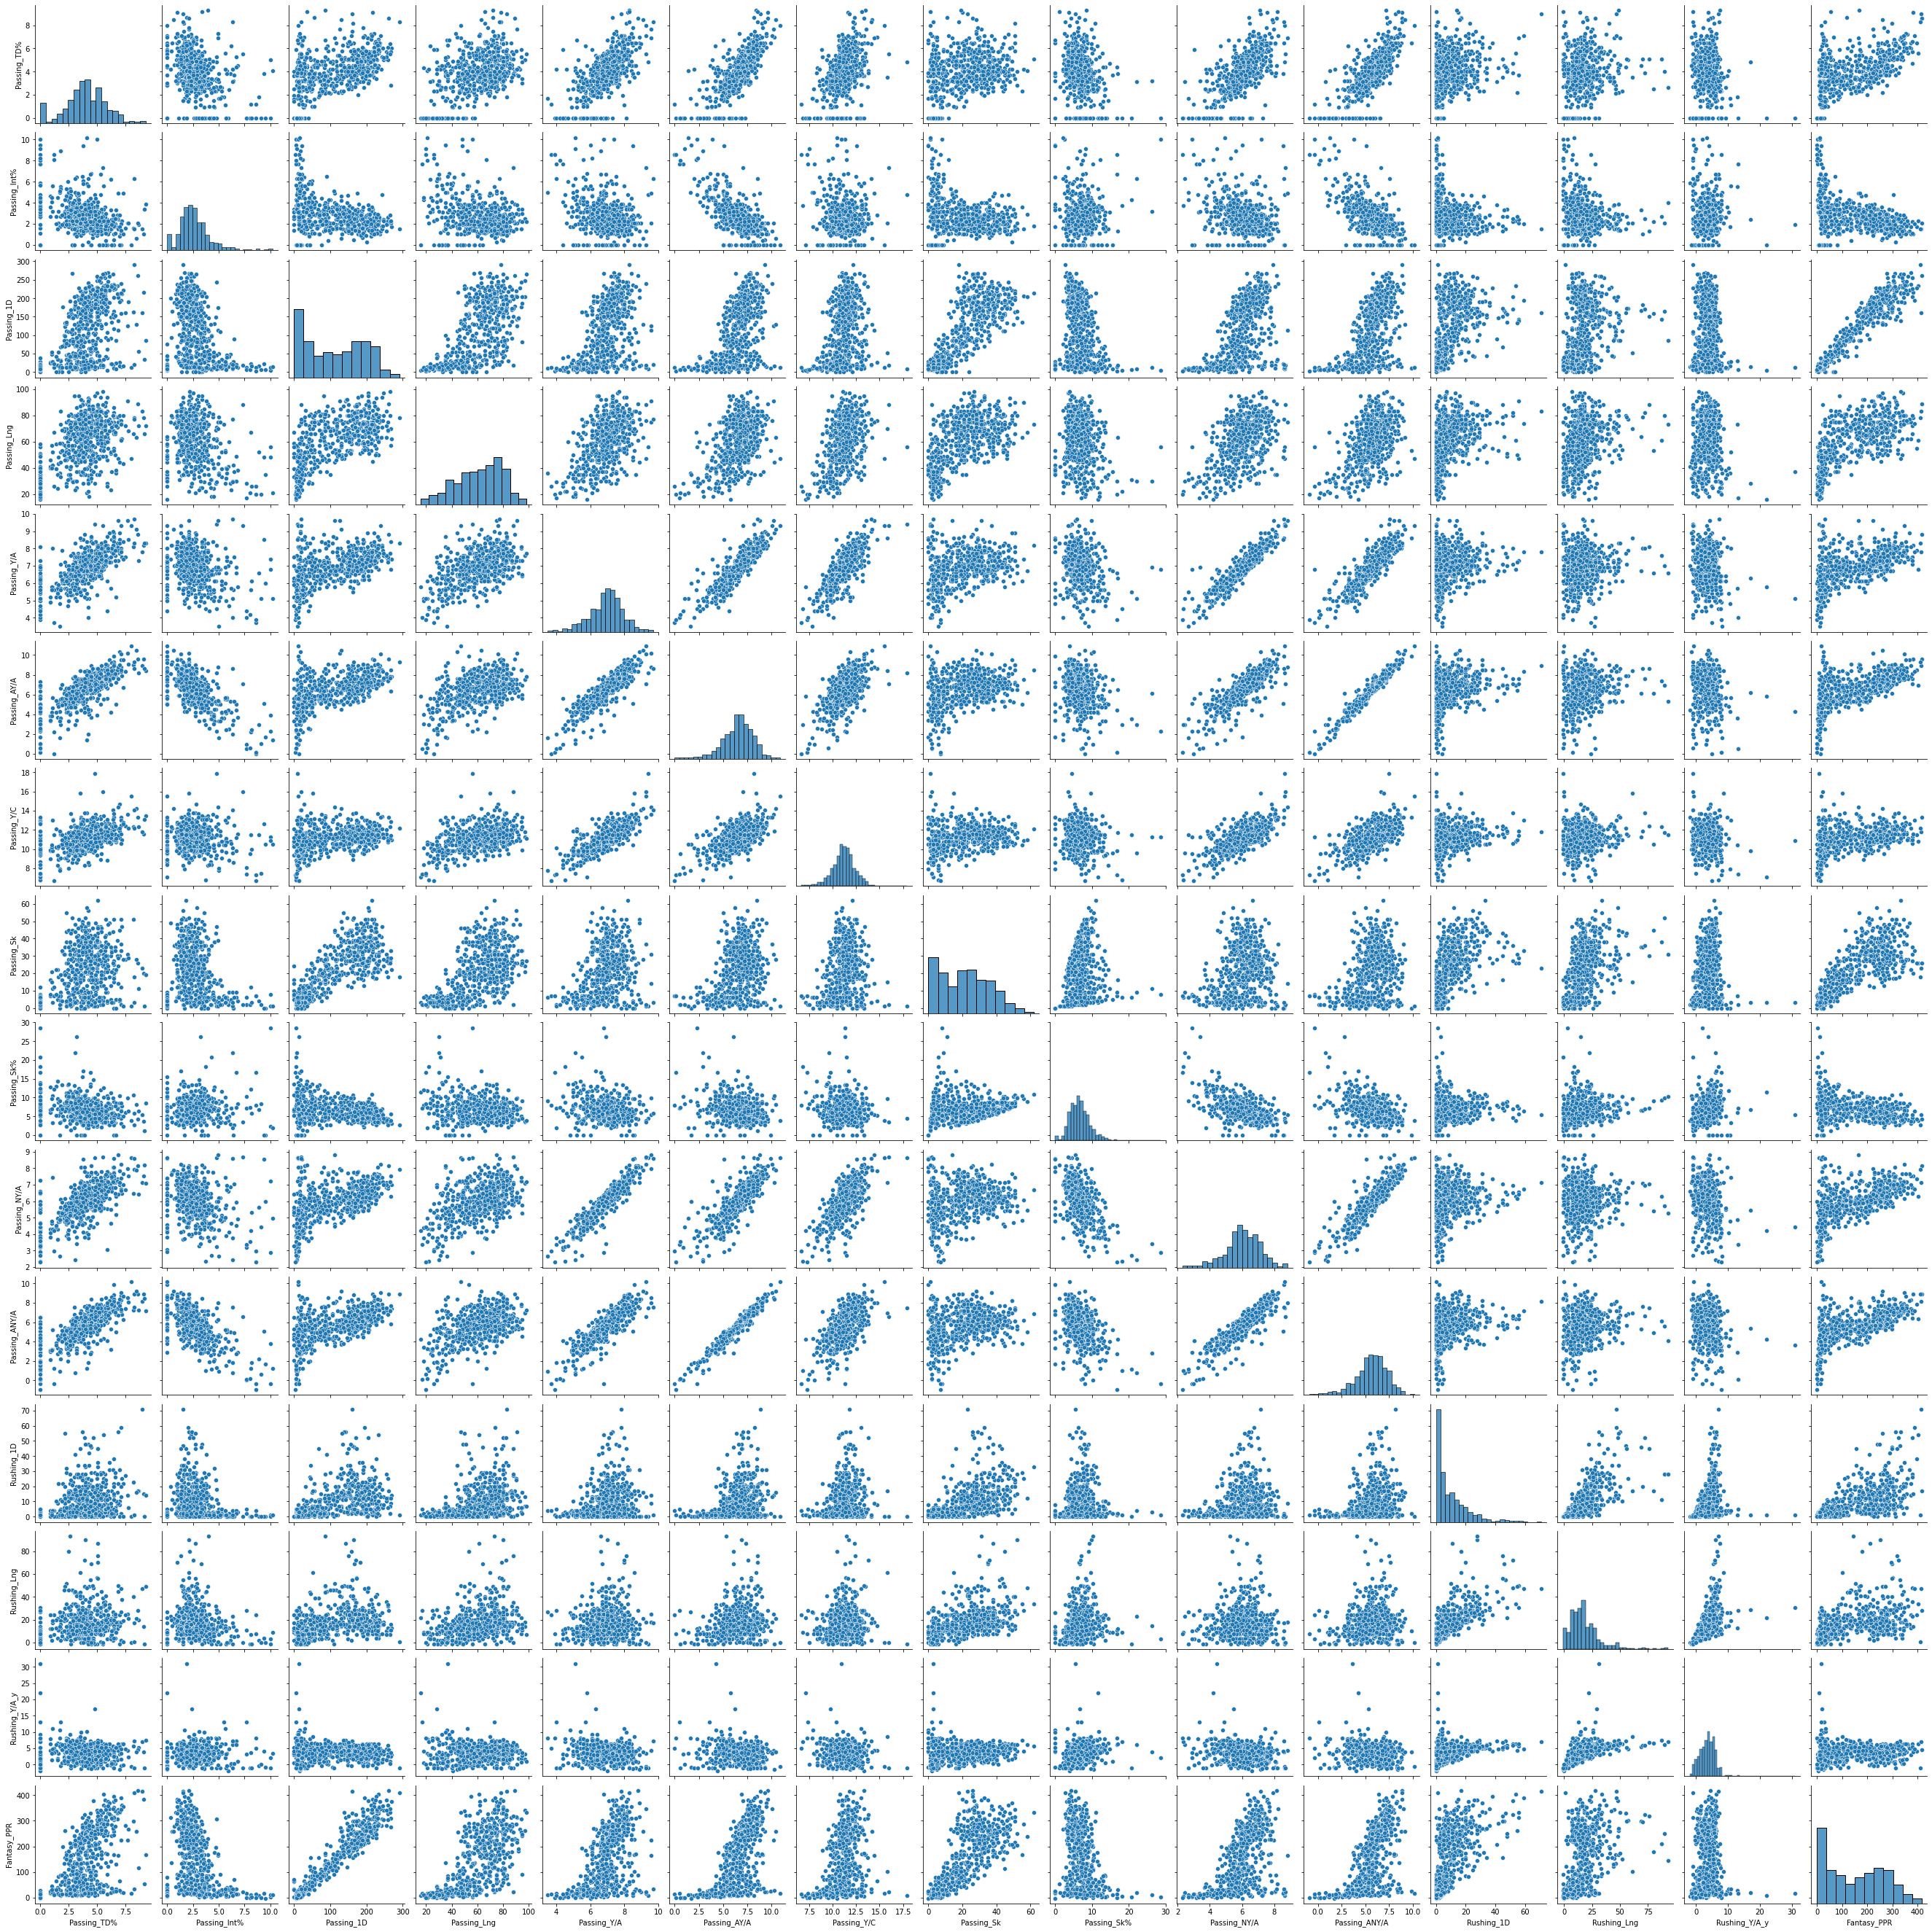

In [332]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

# Separate Datasets by Position
qbs = df[df['Position'] == 'QB']
rbs = df[df['Position'] == 'RB']
wrs = df[df['Position'] == 'WR']
tes = df[df['Position'] == 'TE']

from sklearn.preprocessing import StandardScaler
model = StandardScaler()
qb_reduced_df = qbs[['Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_1D','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
qb_reduced_df = qb_reduced_df.dropna()
model.fit(qb_reduced_df)

sns.pairplot(qb_reduced_df)